<a href="https://colab.research.google.com/github/cdtlaura/NLP/blob/main/last_money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
!pip install alpha_vantage




In [196]:
import yfinance as yf
import pandas as pd

# Download historical data for a specific stock (e.g., AAPL)
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

# Display the first few rows of the dataset
print(data.head())

# Additional processing or analysis code (optional)
# Example: Adding a simple moving average (SMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Print the updated DataFrame with the new SMA column
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2020-01-02 00:00:00+00:00  72.876099  75.087502  75.150002  73.797501   
2020-01-03 00:00:00+00:00  72.167603  74.357498  75.144997  74.125000   
2020-01-06 00:00:00+00:00  72.742653  74.949997  74.989998  73.187500   
2020-01-07 00:00:00+00:00  72.400543  74.597504  75.224998  74.370003   
2020-01-08 00:00:00+00:00  73.565201  75.797501  76.110001  74.290001   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2020-01-02 00:00:00+00:00  74.059998  135480400  
2020-01-03 00:00:00+00:00  74.287498  146322800  
2020-01-06 00:00:00+00:00  73.447502  118387200  
2020-01-07 00:00:00+00:00  74.959999  108872000  
2020-01-08 00:00:00+00:00  74.290001  132079200  
Price          

In [197]:
import numpy as np

# Function to compute the RSI
def compute_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Add RSI to the data
data['RSI'] = compute_rsi(data['Close'])

# Display the updated DataFrame with the RSI column
print(data.head())


Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2020-01-02 00:00:00+00:00  72.876099  75.087502  75.150002  73.797501   
2020-01-03 00:00:00+00:00  72.167603  74.357498  75.144997  74.125000   
2020-01-06 00:00:00+00:00  72.742653  74.949997  74.989998  73.187500   
2020-01-07 00:00:00+00:00  72.400543  74.597504  75.224998  74.370003   
2020-01-08 00:00:00+00:00  73.565201  75.797501  76.110001  74.290001   

Price                           Open     Volume SMA_50 RSI  
Ticker                          AAPL       AAPL             
Date                                                        
2020-01-02 00:00:00+00:00  74.059998  135480400    NaN NaN  
2020-01-03 00:00:00+00:00  74.287498  146322800    NaN NaN  
2020-01-06 00:00:00+00:00  73.447502  118387200    NaN NaN  
2020-01-07 00:00:00+00:00  74.959999  108872000  

In [198]:
# Fill or drop missing values
data.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


<ipython-input-198-fc35a5700624>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


In [ ]:
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['RSI'] = compute_rsi(data['Close'])  # Create a custom function for RSI


In [199]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Close', 'Volume']] = scaler.fit_transform(data[['Close', 'Volume']])


extra steps

In [200]:
# Make sure stock_data and sentiment_data are defined
stock_data = pd.DataFrame({
    'Date': ['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08'],
    'Close': [75.08, 74.35, 74.95, 74.59, 75.79],
    'Volume': [135480400, 146322800, 118387200, 108872000, 132079200]
})
sentiment_data = pd.DataFrame({
    'Date': ['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08'],
    'Sentiment': [0.2, 0.1, -0.1, 0.3, 0.5]
})

# Convert 'Date' columns to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'])


In [201]:
data_combined = pd.merge(stock_data, sentiment_data, on='Date', how='inner')
print(data_combined.head())


        Date  Close     Volume  Sentiment
0 2020-01-02  75.08  135480400        0.2
1 2020-01-03  74.35  146322800        0.1
2 2020-01-06  74.95  118387200       -0.1
3 2020-01-07  74.59  108872000        0.3
4 2020-01-08  75.79  132079200        0.5


In [202]:
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)


In [203]:
features = data[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_50', 'RSI']]


more extrasteps

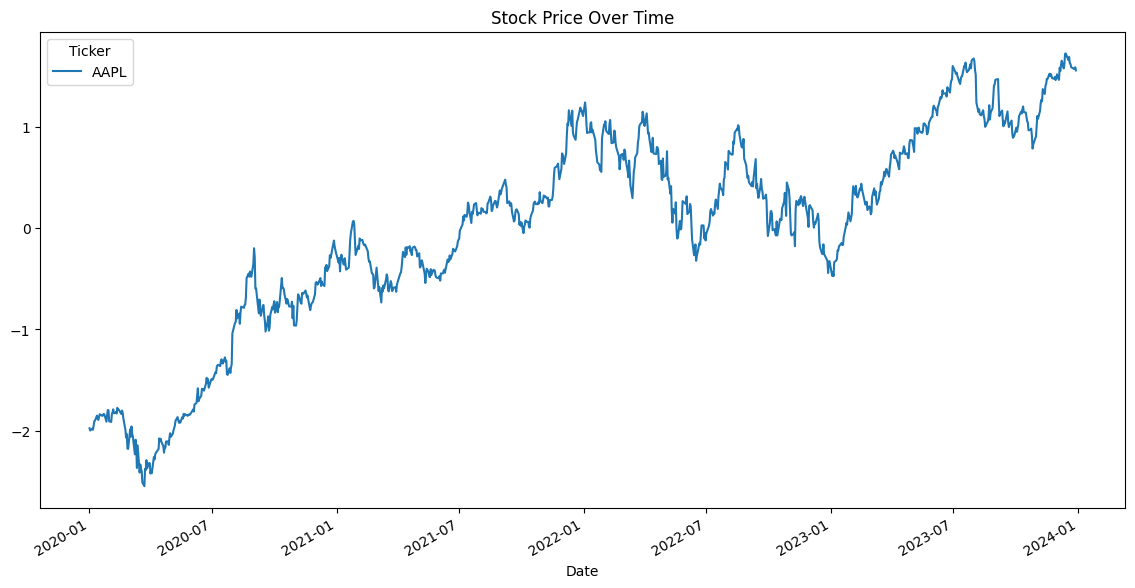

In [204]:
import matplotlib.pyplot as plt

# Plotting the 'Close' price
data['Close'].plot(figsize=(14, 7), title='Stock Price Over Time')
plt.show()


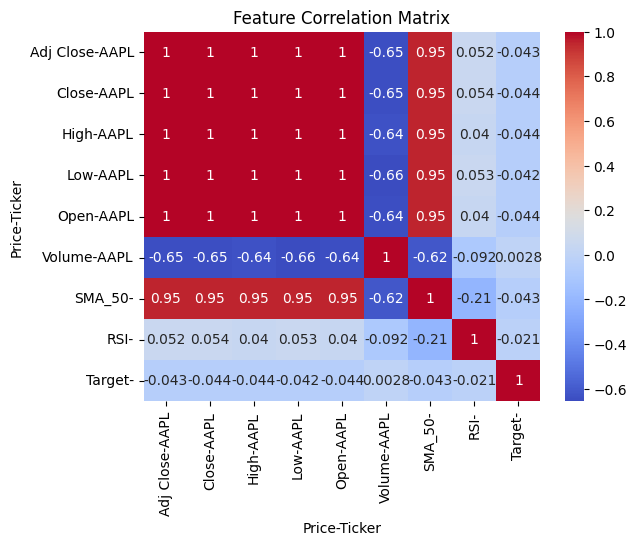

In [205]:
import seaborn as sns

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [206]:
# Flatten the MultiIndex by joining the levels
data.columns = ['_'.join(filter(None, col)).strip() for col in data.columns]

# Now you can access columns as 'Adj Close_AAPL', 'Close_AAPL', etc.
print(data.columns)  # Verify the new column names


Index(['Adj Close_AAPL', 'Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL',
       'Volume_AAPL', 'SMA_50', 'RSI', 'Target'],
      dtype='object')


In [207]:
# Define features (X) and target (y)
X = data[['Close_AAPL', 'Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Volume_AAPL', 'SMA_50', 'RSI']]
y = data['Target']


In [208]:
print("Initial shape of X:", X.shape)
print("Initial shape of y:", y.shape)


Initial shape of X: (1006, 7)
Initial shape of y: (1006,)


In [209]:
# Align indices of X and y to ensure consistency
X, y = X.align(y, join='inner', axis=0)

# Verify the shape after alignment
print("Shape of X after alignment:", X.shape)
print("Shape of y after alignment:", y.shape)

# Check for any remaining NaN values (should be 0)
print("Number of NaNs in X after alignment:", X.isna().sum().sum())
print("Number of NaNs in y after alignment:", y.isna().sum())


Shape of X after alignment: (1006, 7)
Shape of y after alignment: (1006,)
Number of NaNs in X after alignment: 62
Number of NaNs in y after alignment: 0


fill or drop

In [210]:
print(X.head())
print(y.head())


                           Close_AAPL  Open_AAPL  High_AAPL   Low_AAPL  \
Date                                                                     
2020-01-02 00:00:00+00:00   -1.973753  74.059998  75.150002  73.797501   
2020-01-03 00:00:00+00:00   -1.995677  74.287498  75.144997  74.125000   
2020-01-06 00:00:00+00:00   -1.977882  73.447502  74.989998  73.187500   
2020-01-07 00:00:00+00:00   -1.988469  74.959999  75.224998  74.370003   
2020-01-08 00:00:00+00:00   -1.952430  74.290001  76.110001  74.290001   

                           Volume_AAPL  SMA_50  RSI  
Date                                                 
2020-01-02 00:00:00+00:00     0.671853     NaN  NaN  
2020-01-03 00:00:00+00:00     0.871273     NaN  NaN  
2020-01-06 00:00:00+00:00     0.357463     NaN  NaN  
2020-01-07 00:00:00+00:00     0.182453     NaN  NaN  
2020-01-08 00:00:00+00:00     0.609296     NaN  NaN  
Date
2020-01-02 00:00:00+00:00    0
2020-01-03 00:00:00+00:00    1
2020-01-06 00:00:00+00:00    0
2020-

more

In [211]:
print(X.isna().sum())


Close_AAPL      0
Open_AAPL       0
High_AAPL       0
Low_AAPL        0
Volume_AAPL     0
SMA_50         49
RSI            13
dtype: int64


In [212]:
X = X.drop(columns=['SMA_50', 'RSI'])  # Adjust this list based on your findings


In [213]:
X = X[49:]  # Skip the first 49 rows for a 50-day SMA window (adjust as needed)
y = y.loc[X.index]  # Align `y` with the adjusted `X`


In [214]:
X.fillna(method='ffill', inplace=True)
X.fillna(method='bfill', inplace=True)


<ipython-input-214-3b330ec70033>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)
<ipython-input-214-3b330ec70033>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='bfill', inplace=True)


In [215]:
print("Shape of X after handling NaNs:", X.shape)
print("Shape of y after handling NaNs:", y.shape)


Shape of X after handling NaNs: (957, 5)
Shape of y after handling NaNs: (957,)


In [218]:
X, y = X.align(y, join='inner', axis=0)


In [219]:
print(X.head())
print(y.head())


                           Close_AAPL  Open_AAPL  High_AAPL   Low_AAPL  \
Date                                                                     
2020-03-13 00:00:00+00:00   -2.141784  66.222504  69.980003  63.237499   
2020-03-16 00:00:00+00:00   -2.410275  60.487499  64.769997  60.000000   
2020-03-17 00:00:00+00:00   -2.330313  61.877499  64.402496  59.599998   
2020-03-18 00:00:00+00:00   -2.376789  59.942501  62.500000  59.279999   
2020-03-19 00:00:00+00:00   -2.390979  61.847500  63.209999  60.652500   

                           Volume_AAPL  
Date                                    
2020-03-13 00:00:00+00:00     4.998758  
2020-03-16 00:00:00+00:00     4.110237  
2020-03-17 00:00:00+00:00     4.140262  
2020-03-18 00:00:00+00:00     3.702104  
2020-03-19 00:00:00+00:00     3.180186  
Date
2020-03-13 00:00:00+00:00    0
2020-03-16 00:00:00+00:00    1
2020-03-17 00:00:00+00:00    0
2020-03-18 00:00:00+00:00    0
2020-03-19 00:00:00+00:00    0
Name: Target, dtype: int64


In [220]:
print("Number of rows in X before alignment:", X.shape[0])
print("Number of rows in y before alignment:", y.shape[0])
print("Number of rows in X after alignment:", X.shape[0])
print("Number of rows in y after alignment:", y.shape[0])


Number of rows in X before alignment: 957
Number of rows in y before alignment: 957
Number of rows in X after alignment: 957
Number of rows in y after alignment: 957


one more time

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess your data (assuming 'data' is your DataFrame)
# Ensure that 'data' is loaded correctly and is not empty
# Example: data = pd.read_csv('your_data_file.csv')

# Check if the data is empty after loading
if data.empty:
    raise ValueError("Error: The data DataFrame is empty. Please check your data loading process.")

data['Date'] = pd.to_datetime(data.index)
data.set_index('Date', inplace=True)

# Feature engineering
data['Target'] = data['Close_AAPL'].shift(-1)  # Predict the next day's closing price

# ***The fix: Drop the last row instead of all NaN to avoid empty dataframe***
data = data[:-1] # Drop the last row which now contains NaN in the 'Target' column.


# Check if the data is empty after preprocessing
if data.empty:
    raise ValueError("Error: The data DataFrame is empty after preprocessing. Please check your feature engineering or data cleaning steps.")


# Define features (X) and target (y)
X = data[['Close_AAPL', 'Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Volume_AAPL', 'SMA_50', 'RSI']]
y = data['Target']

# Reset index before alignment to avoid issues with mismatched indices
X = X.reset_index(drop=True)  # Reset index of X
y = y.reset_index(drop=True)  # Reset index of y

# Now perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

???????????

In [ ]:
print("Number of NaNs in X_train:", np.isnan(X_train).sum())
print("Number of NaNs in X_test:", np.isnan(X_test).sum())
print("Number of NaNs in y_train:", np.isnan(y_train).sum())
print("Number of NaNs in y_test:", np.isnan(y_test).sum())


Number of NaNs in X_train: Close_AAPL       0
Open_AAPL        0
High_AAPL        0
Low_AAPL         0
Volume_AAPL      0
SMA_50         804
RSI            804
dtype: int64
Number of NaNs in X_test: Close_AAPL       0
Open_AAPL        0
High_AAPL        0
Low_AAPL         0
Volume_AAPL      0
SMA_50         201
RSI            201
dtype: int64
Number of NaNs in y_train: 0
Number of NaNs in y_test: 0


ONE MORE

In [ ]:
NEXT

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess your data (assuming 'data' is your DataFrame)
# Ensure that 'data' is loaded correctly and is not empty
# Example: data = pd.read_csv('your_data_file.csv')

# Check if the data is empty after loading
if data.empty:
    raise ValueError("Error: The data DataFrame is empty. Please check your data loading process.")

data['Date'] = pd.to_datetime(data.index)
data.set_index('Date', inplace=True)

# Feature engineering
data['Target'] = data['Close_AAPL'].shift(-1)  # Predict the next day's closing price

# ***The fix: Drop the last row instead of all NaN to avoid empty dataframe***
data = data[:-1] # Drop the last row which now contains NaN in the 'Target' column.


# Check if the data is empty after preprocessing
if data.empty:
    raise ValueError("Error: The data DataFrame is empty after preprocessing. Please check your feature engineering or data cleaning steps.")


# Define features (X) and target (y)
X = data[['Close_AAPL', 'Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Volume_AAPL', 'SMA_50', 'RSI']]
y = data['Target']

# Reset index before alignment to avoid issues with mismatched indices
X = X.reset_index(drop=True)  # Reset index of X
y = y.reset_index(drop=True)  # Reset index of y

# Now perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X_train and X_test back to DataFrames with original column names
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Use forward fill without the inplace parameter to avoid the warning
X_train['SMA_50'] = X_train['SMA_50'].ffill()  # Forward fill without inplace=True
X_train['RSI'] = X_train['RSI'].ffill()
X_test['SMA_50'] = X_test['SMA_50'].ffill()
X_test['RSI'] = X_test['RSI'].ffill()

# Now you can check for NaNs using isna() on DataFrames
print("Number of NaNs in X_train after handling NaNs:", X_train.isna().sum().sum())
print("Number of NaNs in X_test after handling NaNs:", X_test.isna().sum().sum())
print("Number of NaNs in y_train after handling NaNs:", y_train.isna().sum())
print("Number of NaNs in y_test after handling NaNs:", y_test.isna().sum())


Number of NaNs in X_train after handling NaNs: 0
Number of NaNs in X_test after handling NaNs: 0


STOP

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5758 - mse: 0.5758 - val_loss: 0.1309 - val_mse: 0.1309
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Mean Squared Error: 0.10
R-squared: 0.90


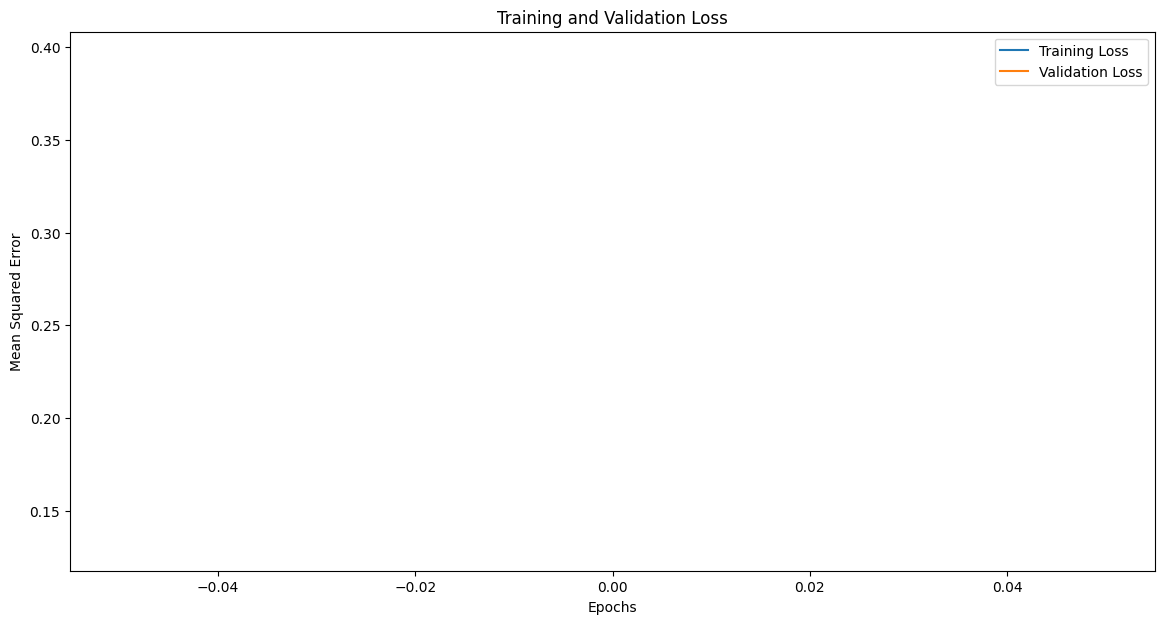

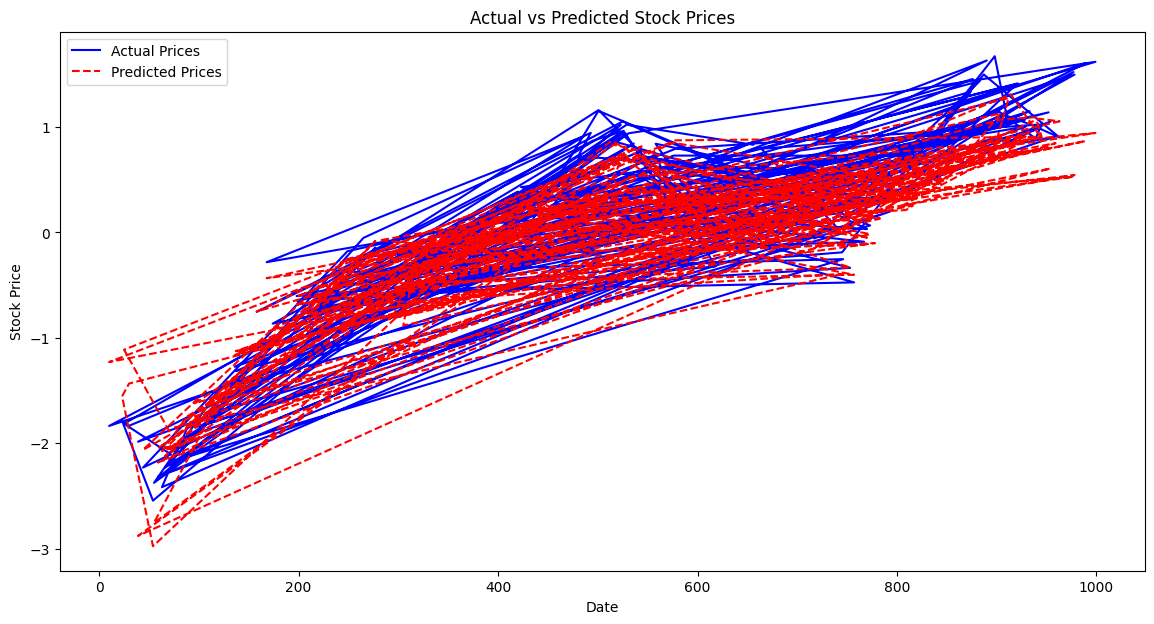

In [227]:
# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the TensorFlow model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=1,
    batch_size=32,
    validation_split=0.2,  # Split the training data to create a validation set
    callbacks=[early_stopping],
    verbose=1
)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot learning curves
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Visualize predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
